# 서울시 시간별 유동인구분석 클래스로 모듈화하기
## 클래스 구조 만들기

>## 메인 클래스인 TimePopAnal 인구분석 클래스 디자인

In [112]:
import matplotlib.pyplot as plt
import datetime

# 인구분석 메인 클래스
class TimePopAnal :
    # 초기화자(생성자)
    def __init__(self, dong_name, dong_code) :
        self.dong_name = dong_name
        self.dong_code = dong_code
        
    # 그래프 그려주는 메소드
    def graph_plot(self, popu_list, label_list, graph_tilte) :
        plt.rc('font', family='AppleGothic')
        plt.title(graph_tilte)
        
        for i in range(len(popu_list)) :
            plt.plot(range(24), popu_list[i], label = label_list[i])
            
        plt.legend()
        plt.xlabel('시간대')
        plt.ylabel('편균인구수')
        plt.xticks(range(24), range(24))
        plt.show()
    
    # 동명, 동코드를 전달 받아서 시간대별 평균 인구 조회 및 시각화 메소드
    def analysis1(self, dong_name, dong_code, graph_yn):
        population = [0 for i in range(24)]
        for row in data :
            if row[2] == dong_code :
                time , p = row[1], row[3]
                population[time] += p
        population = [p / 31 for p in population]
        
        if graph_yn == 'n' :
            return population
        
        population = [population]
        labels = ['평균인구']
        title = dong_name + ' 시간대별 평균인구 그래프'
        self.graph_plot(popu_list= population, label_list= labels, graph_tilte=title)
    
    # 주중 / 주말 인구 분석 기능 메소드
    def analysis2(self):
        weekday = [0 for i in range(24)]
        weekend = [0 for i in range(24)]
        
        for row in data :
            if row[2] == self.dong_code :
                time, p = row[1], row[3]
                year, mon, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
                num = datetime.date(year, mon, day).weekday()
                if num < 5:
                    weekday[time] += p
                else :
                    weekend[time] += p
            
        weekday = [w / 22 for w in weekday]
        weekend = [w / 9 for w in weekend]
        
        data_set = [weekday, weekend]
        labels = ['평일', '주말']
        title = self.dong_name + '평일/주말 시간대별 인구'
        self.graph_plot(popu_list=data_set, label_list=labels, graph_tilte=title)
        
    # 남/여 인구 분석 메소드
    def analysis3(self):
        male = [0 for i in range(24)]
        female = [0 for i in range(24)]
        
        for row in data :
            if row[2] == self.dong_code :
                time = row[1]
                male[time] += sum(row[4:18])
                female[time] += sum(row[18:32])
                
        male = [m / 31 for m in male]
        female = [f / 31 for f in female]
        
        data_set = [male, female]
        labels = ['남성', '여성']
        title = self.dong_name + '평일/주말 시간대별 인구'
        self.graph_plot(popu_list=data_set, label_list=labels, graph_tilte=title)
        
    # 기본적으로 객체 생성시 만들어진 동과 다른 동을 비교 분석하는 메소드
    def analysis4(self, dong_name2, dong_code2):
        # 원래 객체 생성시 주어진 동명, 동코드를 바탕으로 데이터 분석
        population1 = self. analysis1(dong_name=self.dong_name, dong_code=self.dong_code, graph_yn='n')
        
        # 새로 받은 동명, 동코드를 바탕으로 데이터 분석
        population2 = self. analysis1(dong_name=dong_name2, dong_code=dong_code2, graph_yn='n')
        
        # 분석된 두 개의 동을 리스트 구조로 포장(생성)
        data_set = [population1, population2]
        labels = [self.dong_name, dong_name2]
        title = self.dong_name + '/' + dong_name2 + '시간대별 그래프'
        self.graph_plot(popu_list=data_set, label_list=labels, graph_tilte=title)

> csv 파일을 읽어서 raw 데이터 생성

- 인구데이터 읽어들이기
- 동 코드 조회 함수 정의

In [113]:
import csv

def file_open():
    # 1-1. 인구 데이터 파일 읽기
    filePath = './seoul_dong_people_201912.csv'
    f = open(filePath, encoding='utf8')
    data = csv.reader(f)
    next(data)
    data = list(data) 
    
    # 1-2. 행정동코드 데이터 파일 읽기
    f2 = open('./dong_code.csv', encoding='cp949')
    code_data = csv.reader(f2)
    next(code_data)
    next(code_data)
    code_data = list(code_data)
    
    # 1-3. 데이터타입 변환하기 : 문자 -> 숫자
    # 인구데이터의 변환하기
    for row in data :
        for i in range(1, 32):
            if i <= 2: # 인덱스가 2이하인 경우(시간대구분, 행정동코드 등)
                row[i] = int(row[i]) # 정수형으로 변환
            else : # 인덱스다 2초과인 경우(총생활인구수부터)
                row[i] = float(row[i]) # 실수형으로 변환
    
    # 행정동의 코드 변환하기
    for row in code_data :
        row[1] = int(row[1])
    
    return data, code_data

def dong_search(dong_name):
    for row in code_data :
        if row[-1] == dong_name:
            code = row[1]
    print(dong_name, '-', code, '를 분석합니다.')
    return code

 -  동명을 입력 받아서 동코드 정보를 세팅함.

In [114]:
data, code_data = file_open()
input_name1 = input('인구 분석을 원하는 행정동을 입력하세요 ---> ')
input_code1 = dong_search(input_name1)

# 파일을 오프나고 데이터 생성하고 오기 때문에 실행에 시간이 걸림.

인구 분석을 원하는 행정동을 입력하세요 ---> 압구정동
압구정동 - 11680545 를 분석합니다.


 -  입력받은 동을 부석하기 위한 인구분석 객체 생성

In [115]:
hangdang1 = TimePopAnal(input_name1, input_code1)

In [116]:
#globals() # 전역 네임스페이스를 확인할 수 있음

In [117]:
input_name2 = input('인구 분석을 원하는 행정동을 입력하세요 ---> ')
input_code2 = dong_search(input_name2)
hangdang2 = TimePopAnal(input_name2, input_code2)

인구 분석을 원하는 행정동을 입력하세요 ---> 성현동
성현동 - 11620565 를 분석합니다.


 - 입력받은 두 개의 동이 각각 시각화 됨.

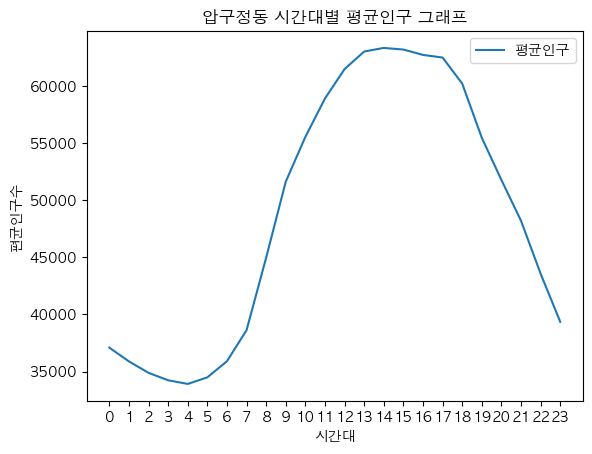

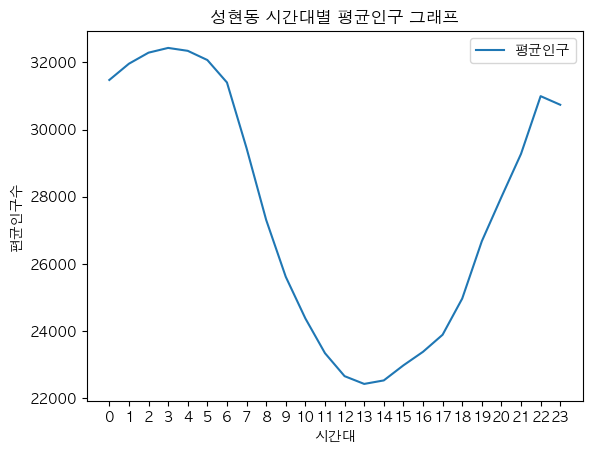

In [118]:
hangdang1.analysis1(input_name1, input_code1, 'y')
hangdang2.analysis1(input_name2, input_code2, 'y')

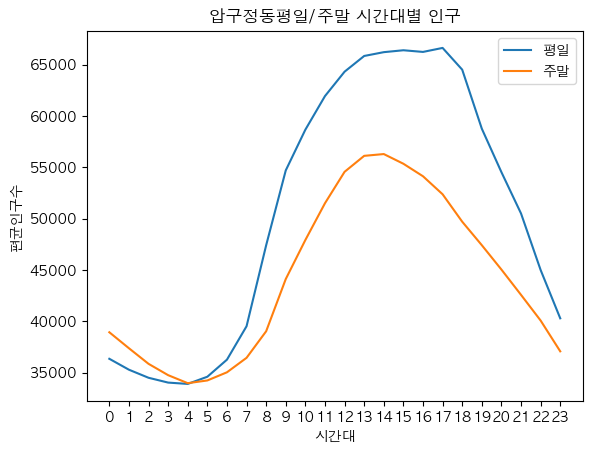

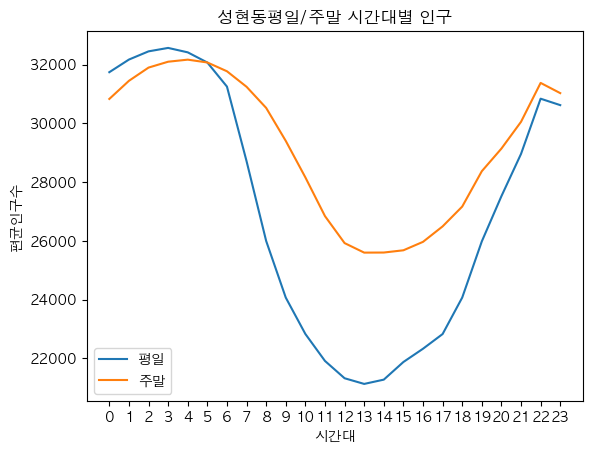

In [119]:
hangdang1.analysis2()
hangdang2.analysis2()

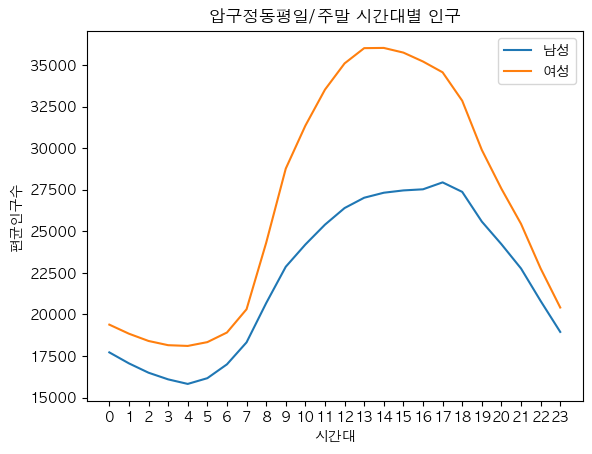

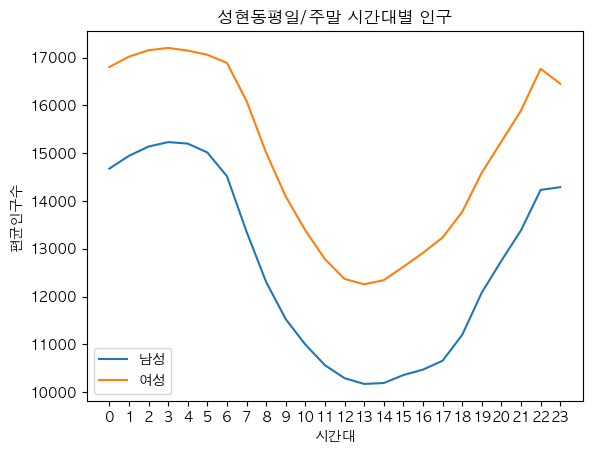

In [120]:
hangdang1.analysis3()
hangdang2.analysis3()

비교할 행정동을 입력하세요 ---> 성현동
성현동 - 11620565 를 분석합니다.


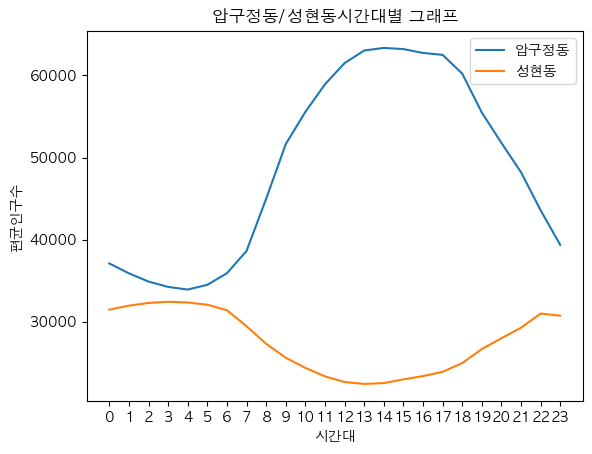

In [121]:
input_name3 = input('비교할 행정동을 입력하세요 ---> ')
input_code3 = dong_search(input_name3)
hangdang1.analysis4(input_name3, input_code3)